## Arthur Kim's Notebook

In [1]:
pwd

'/Users/arthur/Documents/Flatiron/phase_2/Project/dsc-phase-2-project/individual_notebook'

In [2]:
cd ..

/Users/arthur/Documents/Flatiron/phase_2/Project/dsc-phase-2-project


In [3]:
#import appropriate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#read in the file
df = pd.read_csv('data/kc_house_data.csv')

In [5]:
#check the first 5 entries in the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
#check the columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#drop id
df.drop(columns=['id'], inplace=True)

In [8]:
#retrieve the months
df['month_of_date'] = pd.DatetimeIndex(df['date']).month

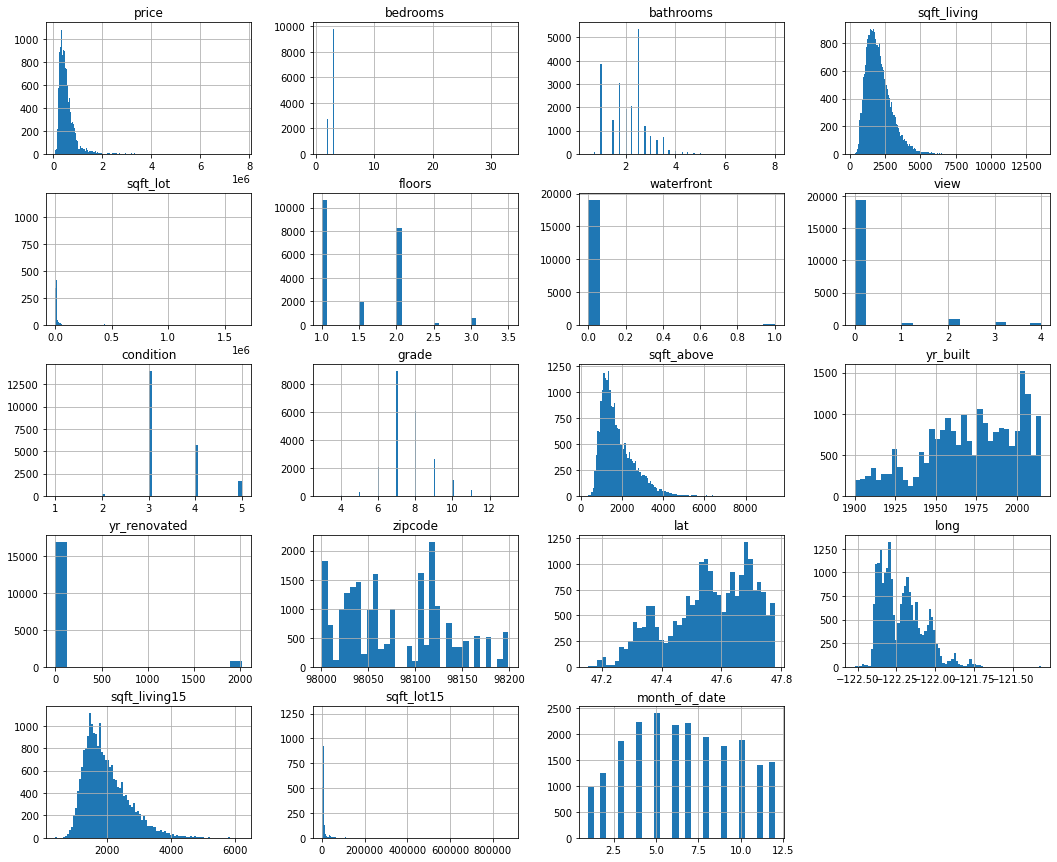

In [9]:
df.hist(figsize=(18,15), bins='auto');

<AxesSubplot:>

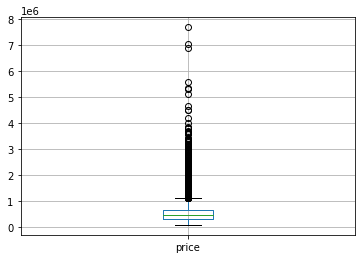

In [10]:
df.boxplot(column=['price'])

In [11]:
print('mean:', df['price'].mean())
print('median:', df['price'].median())
print('max:', df['price'].max())
print('min:', df['price'].min())
print('std:', df['price'].std())
print('25% quartile:', df['price'].quantile(0.25))
print('75% quartile:', df['price'].quantile(0.75))

iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
outlier_above = df[df['price'] > df['price'].quantile(0.75) + 1.5*iqr].price.count()
outlier_below = df[df['price'] < df['price'].quantile(0.25) - 1.5*iqr].price.count()
print('# of outliers above:', outlier_above)
print('# of outliers below:', outlier_below)

mean: 540296.5735055795
median: 450000.0
max: 7700000.0
min: 78000.0
std: 367368.1401013945
25% quartile: 322000.0
75% quartile: 645000.0
# of outliers above: 1158
# of outliers below: 0


In [12]:
#remove price outliers
df = df[df['price'] < df['price'].quantile(0.75) + 1.5*iqr]

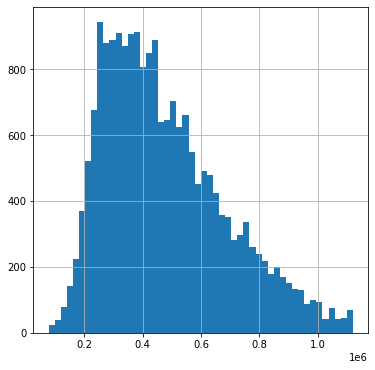

In [13]:
df.price.hist(figsize=(6,6), bins='auto');

In [14]:
#create log price column
df['price_log'] = np.log(df['price'])